In [1]:
import numpy as np
import matplotlib.pyplot as plt

0.09999999999999999


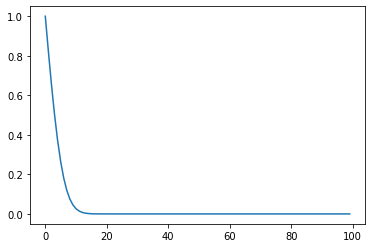

In [2]:
Nx = 100
dt = 10
dx = (1/(Nx+0))
D = 10**(-6)
S = D*dt/(dx*dx)



def analytical_sol(x):
    pass

def apply_boundaries(C):
    C[0] = 1
    C[-1] = C[-2]
    return C

def advance(C):
    new_C = np.empty(len(C))
    for i in range(1, len(C)-1):
        new_C[i] = C[i] + S*(C[i-1] - 2*C[i] + C[i+1])
    apply_boundaries(new_C)
    return np.abs(new_C)

C = np.zeros(Nx)
C = apply_boundaries(C)
res = [C]

for i in range(100):
    C = advance(C)
    res.append(C)

#plt.yscale("log")
print(S)
plt.plot(C)

In [3]:
np.savetxt("out.txt", res)

## Ex 3.2 - Upwind

$$
\frac{\partial C_i}{\partial t} = U \cdot \frac{\partial C_i}{\partial x}
$$

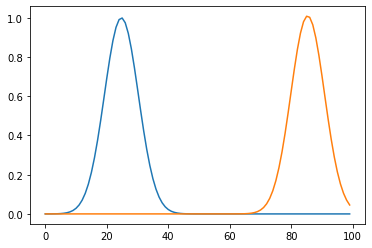

In [26]:
dx = 0.01
Nx = int(1/dx)
x_vals = np.linspace(0,1, Nx)
Co = 1.01


def initial_gauss(x):
    return np.exp(-10.*np.power(4*x-1,2))



def advance_upwind(C):
    new_C = np.copy(C)
    for i in range(1, len(C)):
        new_C[i] = (1 - Co) * C[i] + Co * C[i-1]
    return new_C

x_vals = np.linspace(0,1, Nx)
C = initial_gauss(x_vals)
plt.plot(C)

for i in range(60):
    C = advance_upwind(C)
    #res.append(C)
plt.plot(C)